<a href="https://colab.research.google.com/github/latharani23/SWIFT-DATA-ANALYSIS/blob/main/SWIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn


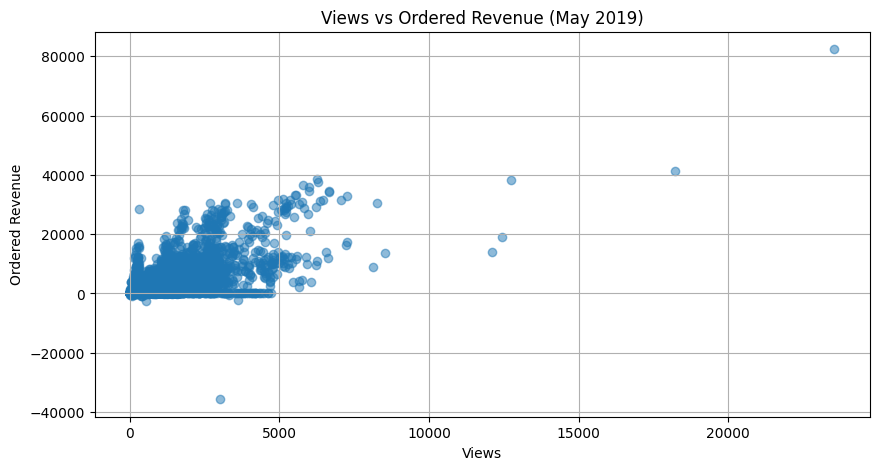

    feed_date  ordered_revenue     views
0  2019-05-01        803075.96  236539.0
1  2019-05-02        748069.15  234891.0
2  2019-05-03        697811.63  218696.0
3  2019-05-04        399447.01  198835.0
4  2019-05-05        426373.56  224325.0
5  2019-05-06        778274.28  255662.0
6  2019-05-07        726195.00  235977.0
7  2019-05-08        840666.46  259336.0
8  2019-05-09        766952.57  239582.0
9  2019-05-10        700973.61  217879.0
10 2019-05-11        381390.61  200070.0
11 2019-05-12        362518.41  216421.0
12 2019-05-13        707322.18  245133.0
13 2019-05-14        723901.56  246303.0
14 2019-05-15        739669.86  242212.0
15 2019-05-16        747787.91  235616.0
16 2019-05-17        675010.32  216446.0
17 2019-05-18        385472.70  201123.0
18 2019-05-19        380433.52  214887.0
19 2019-05-20        748380.18  258740.0
20 2019-05-21        921761.89  314645.0
21 2019-05-22        769633.54  251570.0
22 2019-05-23        701177.05  239202.0
23 2019-05-24   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (update paths as necessary)
# sales_data = pd.read_csv('path/to/sales_data.csv')
# glance_views = pd.read_csv('path/to/glance_views.csv')

# For demonstration, assuming the DataFrames are already defined
# sales_data = ...
# glance_views = ...

# Convert 'feed_date' to datetime
sales_data['feed_date'] = pd.to_datetime(sales_data['feed_date'])
glance_views['feed_date'] = pd.to_datetime(glance_views['feed_date'])

# Merge datasets on SKU and feed date
merged_data = pd.merge(sales_data, glance_views, on=['sku_name', 'feed_date'], how='outer')

# Filter by date range (if needed)
start_date = '2019-05-01'
end_date = '2019-05-31'
filtered_data = merged_data[(merged_data['feed_date'] >= start_date) & (merged_data['feed_date'] <= end_date)]

# Example of plotting ordered revenue against views
plt.figure(figsize=(10, 5))
plt.scatter(filtered_data['views'], filtered_data['ordered_revenue'], alpha=0.5)
plt.title('Views vs Ordered Revenue (May 2019)')
plt.xlabel('Views')
plt.ylabel('Ordered Revenue')
plt.grid()
plt.show()

# Aggregate data by date
daily_summary = filtered_data.groupby('feed_date').agg({
    'ordered_revenue': 'sum',
    'views': 'sum'
}).reset_index()

# Display the daily summary
print(daily_summary)


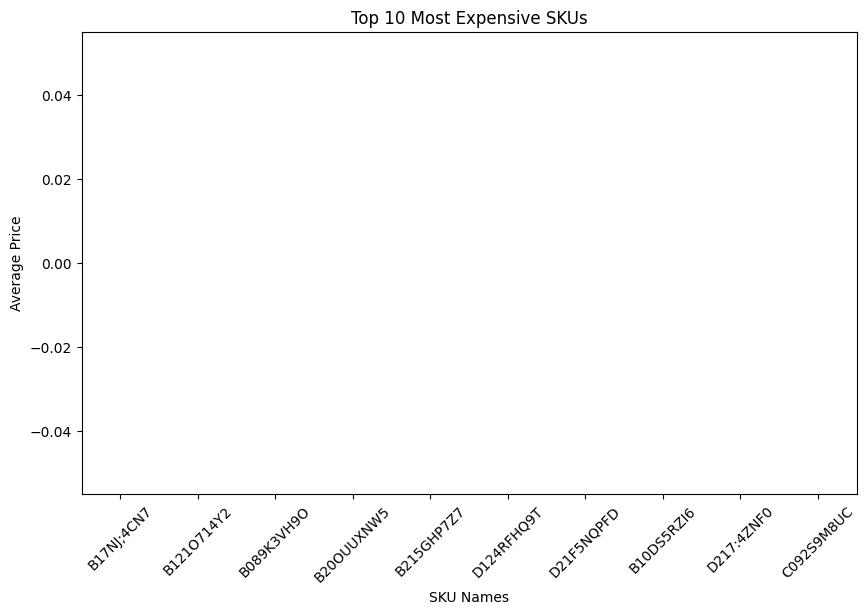

Most Expensive SKU: B01DQ37D1Q


In [ ]:
# Ensure the column names are standardized
sales_data.columns = sales_data.columns.str.strip().str.upper()

# Calculate average price for each SKU
sales_data['AVERAGE_PRICE'] = sales_data['ORDERED_REVENUE'] / sales_data['ORDERED_UNITS']
most_expensive_sku = sales_data.groupby('SKU_NAME')['AVERAGE_PRICE'].mean().idxmax()
average_prices = sales_data.groupby('SKU_NAME')['AVERAGE_PRICE'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
average_prices.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Expensive SKUs')
plt.xlabel('SKU Names')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

print(f'Most Expensive SKU: {most_expensive_sku}')


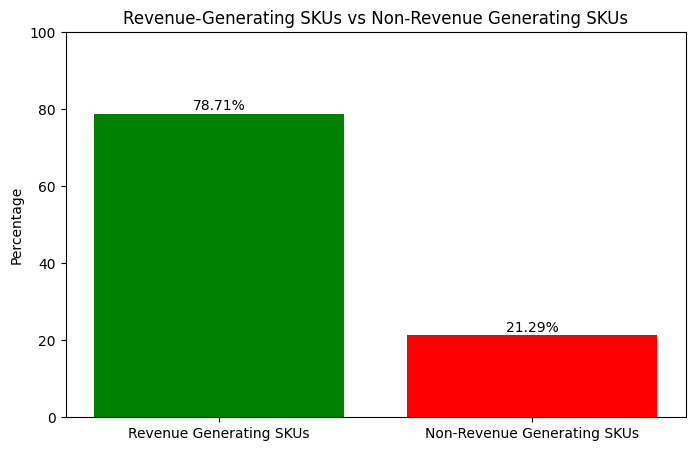

Percentage of Revenue-Generating SKUs: 78.71%
SKUs stopped selling after July: ['B00;3H5XG9', 'B00DHPE[3Z', 'B012GU7SOL', 'B012JWTJDC', 'B013WPQZ2U', 'B01F[:YLFY', 'B01R0I8KFH', 'B07XI2QS2Z', 'B08:;5YP75', 'B08Y472N[U', 'B10:1TJG86', 'B115ICA8LF', 'B116DUQLEB', 'B11:4F6680', 'B11CDKYM3J', 'B1255YTFGA', 'B125:PNERK', 'B12MWAOCYI', 'B13M0T8ZQM', 'B1826\\GXMM', 'B186S:OSH:', 'B1878K26WG', 'B205J5RPJQ', 'B20EKD5JF4', 'B213K5FIPU', 'B214M:0:PC', 'B21B6UON52', 'B21E\\9ZKDH', 'B21LO8TNNY', 'B21PQ3RNQO', 'B225I326ET', 'B22OVTXOIY', 'B22OZ6\\O1[', 'B286Q8QSM:', 'B28CTPKMT8', 'C019:8WTE8', 'C019SRO\\MJ', 'C01JPONNVK', 'C01UZDOXX8', 'C024XPOJL[', 'C02JAMMO55', 'C02KP:UMZK', 'C035O8\\UJC', 'C076JT7:XY', 'C079F4K8DN', 'C07CSIE3MV', 'C09;:9PR57', 'C115HUW5SO', 'C11M2YN8S4', 'C11ULFE71M', 'C12;C;8OPZ', 'C12KPWM3IJ', 'C13EHKRAS4', 'C174KT1O8T', 'C17672PZ9O', 'C17;Q9:IS5', 'C17E92HXZK', 'C17EHWN2PD', 'C1964PSQ[N', 'C20VWL6T29', 'C213I5Z84I', 'C214:PRAT2', 'C21EJJQCUE', 'C21LXX222C', 'C21PIJY9C2', 'C225

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the date is in the correct format
sales_data['FEED_DATE'] = pd.to_datetime(sales_data['FEED_DATE'])

# Calculate percentage of SKUs with revenue
revenue_generating_skus = sales_data[sales_data['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()
total_skus = sales_data['SKU_NAME'].nunique()
percentage_revenue_skus = (revenue_generating_skus / total_skus) * 100

# Identify SKUs that stopped selling after July
stopped_selling_after_july = sales_data[sales_data['FEED_DATE'] > '2019-07-31'].groupby('SKU_NAME')['ORDERED_UNITS'].sum()
stopped_skus = stopped_selling_after_july[stopped_selling_after_july == 0].index.tolist()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(['Revenue Generating SKUs', 'Non-Revenue Generating SKUs'],
        [percentage_revenue_skus, 100 - percentage_revenue_skus],
        color=['green', 'red'])

for i, v in enumerate([percentage_revenue_skus, 100 - percentage_revenue_skus]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.title('Revenue-Generating SKUs vs Non-Revenue Generating SKUs')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

print(f'Percentage of Revenue-Generating SKUs: {percentage_revenue_skus:.2f}%')
print(f'SKUs stopped selling after July: {stopped_skus}')


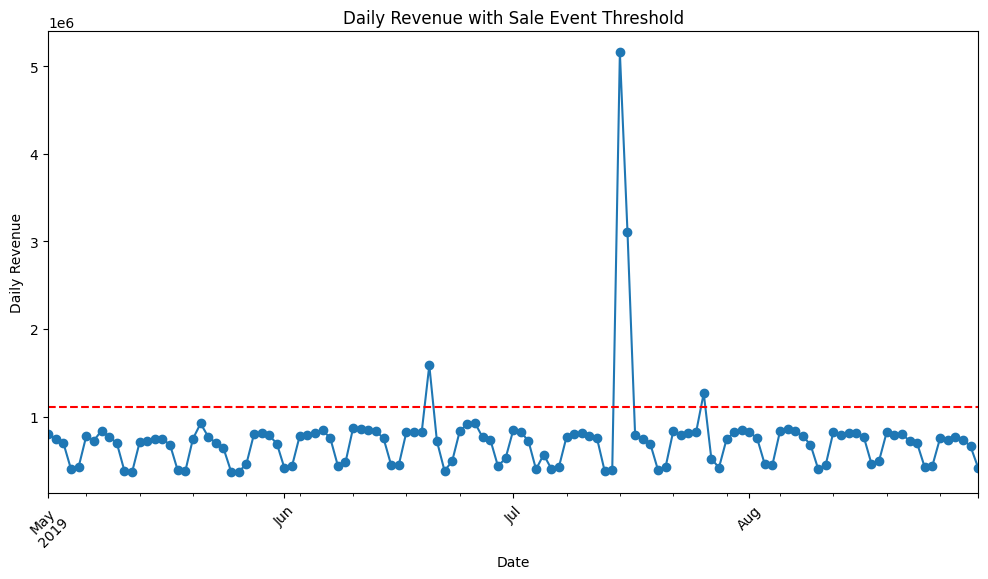

Sale Event Dates: [Timestamp('2019-06-20 00:00:00'), Timestamp('2019-07-15 00:00:00'), Timestamp('2019-07-16 00:00:00'), Timestamp('2019-07-26 00:00:00')]


In [ ]:
# Identify sale event by looking for spikes in revenue
daily_revenue = sales_data.groupby('FEED_DATE')['ORDERED_REVENUE'].sum()
sale_event_dates = daily_revenue[daily_revenue > daily_revenue.mean() * 1.5].index.tolist()

# Plot
plt.figure(figsize=(12, 6))
daily_revenue.plot(kind='line', marker='o')
plt.axhline(y=daily_revenue.mean() * 1.5, color='red', linestyle='--')
plt.title('Daily Revenue with Sale Event Threshold')
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.xticks(rotation=45)
plt.show()

print(f'Sale Event Dates: {sale_event_dates}')


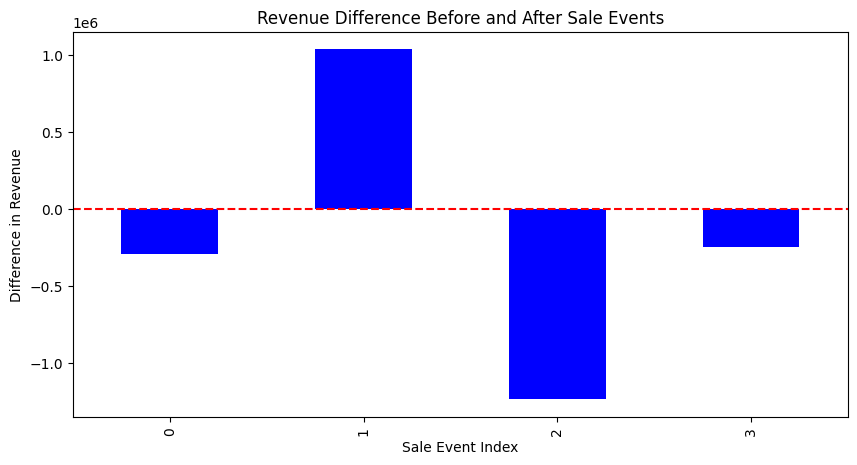

In [ ]:
# Compare sales before and after sale event
before_after = []
for date in sale_event_dates:
    before = daily_revenue[daily_revenue.index < date].tail(3).mean()  # Last 3 days before
    after = daily_revenue[daily_revenue.index > date].head(3).mean()  # First 3 days after
    before_after.append((before, after))

# Create a DataFrame for visualization
cannibalization_df = pd.DataFrame(before_after, columns=['Before', 'After'])
cannibalization_df['Difference'] = cannibalization_df['After'] - cannibalization_df['Before']

# Plotting the effect
plt.figure(figsize=(10, 5))
cannibalization_df['Difference'].plot(kind='bar', color='blue')
plt.title('Revenue Difference Before and After Sale Events')
plt.xlabel('Sale Event Index')
plt.ylabel('Difference in Revenue')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Group by 'FEED_DATE' and 'SUB_CATEGORY' and aggregate ordered units
daily_sales = sales_data.groupby(['FEED_DATE', 'SUB_CATEGORY'])['ORDERED_UNITS'].sum().reset_index()

# Filter out zero sales
daily_sales = daily_sales[daily_sales['ORDERED_UNITS'] > 0]

# Calculate growth rates by subcategory
daily_sales['GROWTH_RATE'] = daily_sales.groupby('SUB_CATEGORY')['ORDERED_UNITS'].pct_change()

# Find the slowest growing subcategory based on the minimum growth rate
slowest_growing = daily_sales.loc[daily_sales['GROWTH_RATE'] != -np.inf].loc[daily_sales['GROWTH_RATE'].idxmin()]

print(f'Slowest Growing Subcategory: {slowest_growing["SUB_CATEGORY"]} with a growth rate of {slowest_growing["GROWTH_RATE"]:.2%}')


Slowest Growing Subcategory: 0455 Keyboards - DELETED with a growth rate of -99.62%


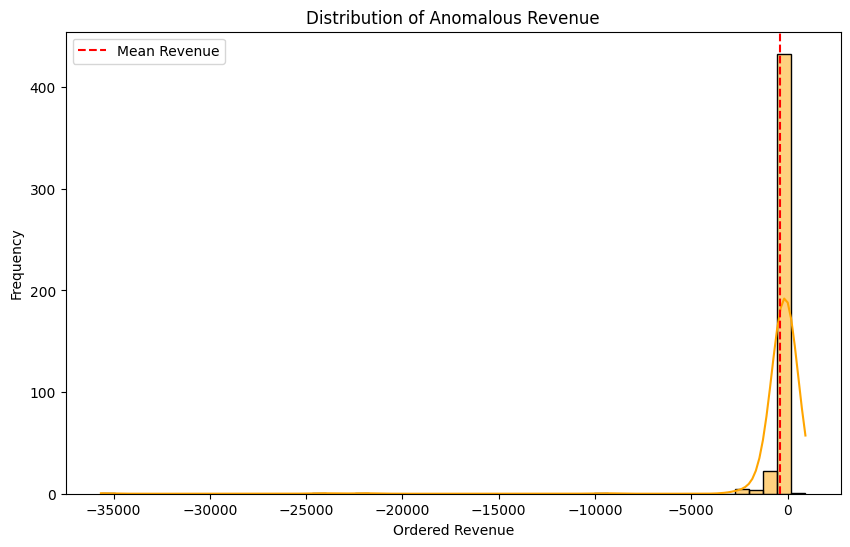

In [ ]:
# Plot anomalies if any
if not anomalies.empty:
    plt.figure(figsize=(10, 6))

    # Plot histogram with adjusted bins
    sns.histplot(anomalies['ORDERED_REVENUE'], bins=50, color='orange', kde=True)

    # Add a vertical line for the mean
    mean_value = anomalies['ORDERED_REVENUE'].mean()
    plt.axvline(mean_value, color='red', linestyle='--', label='Mean Revenue')

    # Titles and labels
    plt.title('Distribution of Anomalous Revenue')
    plt.xlabel('Ordered Revenue')
    plt.ylabel('Frequency')
    plt.legend()

    plt.show()


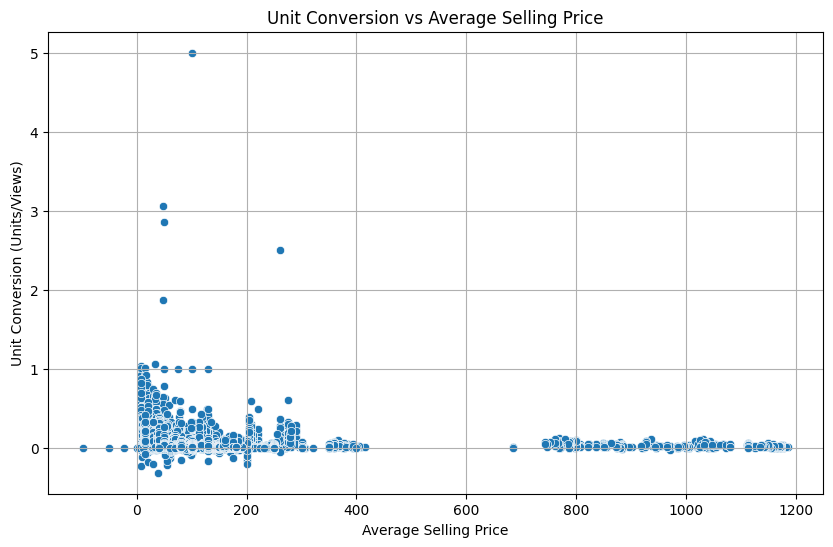

Correlation between Unit Conversion and Average Selling Price: -0.22


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure proper column names in lowercase and without spaces
sales_data.columns = sales_data.columns.str.strip().str.lower()
glance_views.columns = glance_views.columns.str.strip().str.lower()

# Remove any duplicate columns in sales_data
sales_data = sales_data.loc[:, ~sales_data.columns.duplicated()]

# Check for necessary columns
if 'sku_name' in sales_data.columns and 'feed_date' in sales_data.columns:
    # Calculate average price using .loc to avoid SettingWithCopyWarning
    sales_data.loc[:, 'average_price'] = sales_data['ordered_revenue'] / sales_data['ordered_units'].replace(0, np.nan)

    # Merge the datasets
    merged_data = sales_data.merge(glance_views, on=['sku_name', 'feed_date'], how='inner')

    # Calculate Unit Conversion
    merged_data.loc[:, 'unit_conversion'] = merged_data['ordered_units'] / merged_data['views'].replace(0, np.nan)

    # Calculate correlation
    correlation = merged_data[['unit_conversion', 'average_price']].corr().iloc[0, 1]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_data, x='average_price', y='unit_conversion')
    plt.title('Unit Conversion vs Average Selling Price')
    plt.xlabel('Average Selling Price')
    plt.ylabel('Unit Conversion (Units/Views)')
    plt.grid(True)
    plt.show()

    print(f'Correlation between Unit Conversion and Average Selling Price: {correlation:.2f}')
else:
    print("Required columns not found in the DataFrames.")
